Script to plot HadISST data for Supplemental Figure S1. These can be downloaded from https://www.metoffice.gov.uk/hadobs/hadisst/, and I had data for 1950-2017 available. Started this project a long time ago!

In [15]:
#Load modules, etc.
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

In [16]:
#Load data, note that I had already selected data averaged from 5S to 5N, in the tropical Pacific
yr_sst = np.load( "SSTs/HADISST_AM.dat" )
mean = np.mean( yr_sst, axis = 0 ) #Get climatology
l, j = np.shape( yr_sst)

#Get histograms
bins = np.arange(20., 32., 0.25 )
hist = np.zeros( ( j, len( bins ) - 1 ) )
for i in range( j ):
    hist[i], bin = np.histogram( yr_sst[:, i], bins = bins, density = True )
hist = np.swapaxes( hist, 0, 1 )

longitude = np.linspace( 125., 271., j ) #Make longitudes

In [17]:
#Make SST profile:
d2 = 4096
x = np.linspace(0, float(d2) * 3000., d2)

T = 2. * np.cos( x * np.pi / max(x)) + 300.5
T2 = 2.5 * np.cos( x * np.pi / max(x)) + 300.5
T3 = 3. * np.cos( x * np.pi / max(x)) + 300.5

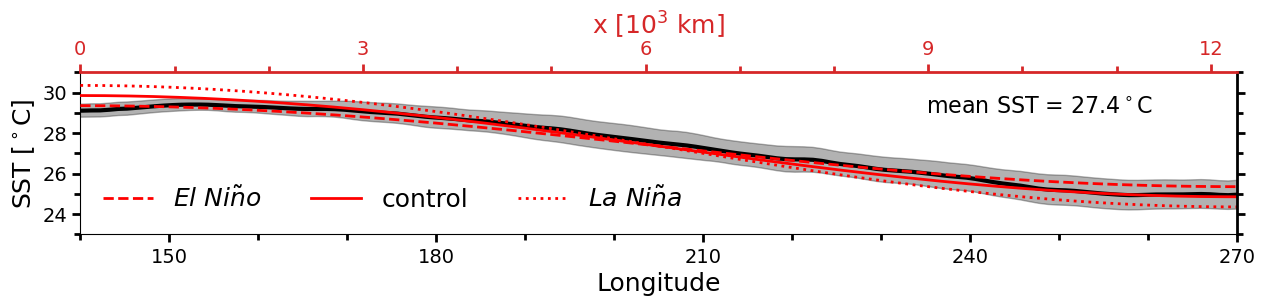

In [18]:
#Plot!
cs = [(31 / 255., 119 / 255., 180 / 255.), (44. / 255., 160 / 255., 44 / 255.), (214 / 255., 39 / 255., 40 / 255.), (255 / 255., 127 / 255., 14 / 255.), (148 / 255., 103 / 255., 189 / 255.) ]

fig = plt.figure( figsize = (13, 3) )
plt.subplots_adjust(left = 0.07, right = 0.96, bottom = 0.25, top = 0.79, hspace = 0.)

ax1 = plt.subplot(1, 1, 1)
#plt.title( "SST PDFs, Mean = 27.4$^\circ$C", fontsize = 14. )

v = np.linspace( 0.1, 1.2, 20 )

mean = np.mean( yr_sst, axis = 0 )

plt.plot( longitude, mean, color = 'k', linewidth = 3. )
plt.fill_between( longitude, mean - np.std(yr_sst, axis = 0),mean + np.std(yr_sst, axis = 0), 
                 color = 'k', alpha = 0.3 )


#plt.contourf( longitude, (bins[1:] + bins[:len(bins) - 1]) / 2., hist, v, cmap = plt.cm.Blues)
#cset = plt.colorbar(ticks = [0., 0.5, 1., 1.5, 2.])
#cset.set_label( "Density [$^\circ$C$^{-1}$]", fontsize = 16 )

plt.xlabel( "Longitude", fontsize = 18.)
plt.ylabel( "SST [$^\circ$C]", fontsize = 18.)

ax1.tick_params(axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = "out")
ax1.tick_params(axis="y", which="both", bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on", direction = "out") 
ax1.tick_params(length = 6, which = 'major')
ax1.tick_params(length = 4, which = 'minor')

majorLocator = MultipleLocator( 30 )
minorLocator = MultipleLocator( 10 )

ax1.xaxis.set_major_locator( majorLocator )
ax1.xaxis.set_minor_locator( minorLocator )

majorLocator = MultipleLocator( 2 )
minorLocator = MultipleLocator( 1 )

plt.text( 235, 29, "mean SST = 27.4$^\circ$C", fontsize = 16. )

plt.ylim([23., 31.])
plt.xlim([140., 270.])
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

ax1.yaxis.set_major_locator( majorLocator )
ax1.yaxis.set_minor_locator( minorLocator )
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.xticks(fontsize = 14 )
plt.yticks(fontsize = 14 )
ax1.tick_params(which='both', width=2)

ax2 = ax1.twiny()
ax2.spines['top'].set_edgecolor(cs[2])


Ts = np.zeros( ( 3, d2))
Ts[0] = T
Ts[1] = T2
Ts[2] = T3

evenly_spaced_interval = np.linspace(0, 1, 3)
colors = [plt.cm.cool(i) for i in evenly_spaced_interval]
opt = ["r--", 'r', 'r:']
for i in range(3):
    ax2.plot(x / 1000. / 1000., Ts[i] - 273.15, opt[i], lw=2)

    
#ax2.plot( x / 1000. / 1000., T - 273.15 , color = cs[2], linewidth = 2. )
#ax2.plot( x / 1000. / 1000., T2 - 273.15 , '--', color = cs[2], linewidth = 2. )
#ax2.plot( x / 1000. / 1000., T3 - 273.15 , ':', color = cs[2], linewidth = 2. )

ax2.set_xlabel( "x [10$^3$ km]", fontsize = 18, color = cs[2])

majorLocator = MultipleLocator(3)
minorLocator = MultipleLocator(1)
ax2.xaxis.set_major_locator(majorLocator)
ax2.xaxis.set_minor_locator(minorLocator)
plt.xticks(fontsize = 14, color = cs[2] )
plt.yticks(fontsize = 14 )
plt.xlim([0., 12.28])
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)


ax2.tick_params(length = 6, which = 'major', color = cs[2])
ax2.tick_params(length = 4, which = 'minor', color = cs[2])
 
for axis in ['top','bottom','left','right']:
      ax2.spines[axis].set_linewidth(2)
ax2.tick_params(which='both', width=2)

plt.legend(["$El$ $Ni\~no$", "control", "$La$ $Ni\~na$"], loc = 'lower left', frameon = False, ncol = 3, fontsize = 18)

#plt.savefig("HADISST_Pacific_SSTs.png")
#plt.savefig("HADISST_Pacific_SSTs.pdf")